In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers.smpl_to_df import smpl_to_df

In [46]:
frames_to_drop = (0, 0)
load = 'data/demo_walk_21.pkl'
df = smpl_to_df(load, frames_to_drop)

(105, 69)


In [47]:
#make an array of zeros the length of the data
def annotate_data(df, right_int, left_int, frames_to_drop):
    right_touch = []
    left_touch = []

    #set the values of the array to 1 in the interval defined by right_int and left_int
    # for i in range(len(df)):
    
    right_int = np.array(right_int) - frames_to_drop[0]
    left_int = np.array(left_int) - frames_to_drop[0]
    
    right_int = np.append(right_int, len(df))
    left_int = np.append(left_int, len(df))
    
    support = True
    for intervals in range(len(right_int)-1):
        apps = right_int[intervals+1] - right_int[intervals]
        for i in range(apps):
            right_touch.append(int(support))
        
        # print(right_int[intervals], right_int[intervals+1], support)
        support = not support
        # print(support)
    
    # print(right_touch)
    support = True
    for intervals in range(len(left_int)-1):
        apps = left_int[intervals+1] - left_int[intervals]
        for i in range(apps):
            left_touch.append(int(support))
            
        support = not support
    
    #fill the array with zeros for the rest of the data such that the array is the same length as the df
    right_touch = np.array(right_touch)
    left_touch = np.array(left_touch)
    
    right_touch = np.append(right_touch, np.zeros(len(df)-len(right_touch)))
    left_touch = np.append(left_touch, np.zeros(len(df)-len(left_touch)))

    

    return right_touch, left_touch

In [48]:
right_int = [0, 18, 32, 53, 65, 90, 102]
left_int = [0, 1, 13, 36, 48, 71, 84]
right_touch, left_touch = annotate_data(df, right_int, left_int, frames_to_drop)

print(right_touch[-1])
print(left_touch[-1])

1.0
1.0


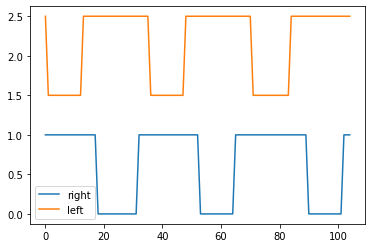

In [49]:
plt.plot(right_touch, label='right')
plt.plot(left_touch+1.5, label='left')
plt.legend()
plt.show()

In [50]:
#add the array to the df as a column
df['right_touch'] = right_touch
df['left_touch'] = left_touch

In [51]:
#save the df as a csv
path = load.split('/')[1][:-4]
df.to_csv(f'wip/{path}_train.csv')